# AML - Assignment N°2

>Nome: **Alessandro**  
Cognome: **Pigato**  
N° Matricola: **852482**  

The dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 
  
There are 25 variables:  
  
>* ID: ID of each client  
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit  
* SEX: Gender (1=male, 2=female)  
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
* MARRIAGE: Marital status (1=married, 2=single, 3=others)  
* AGE: Age in years  
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)  
* PAY_2: Repayment status in August, 2005 (scale same as above)  
* PAY_3: Repayment status in July, 2005 (scale same as above)  
* PAY_4: Repayment status in June, 2005 (scale same as above)  
* PAY_5: Repayment status in May, 2005 (scale same as above)  
* PAY_6: Repayment status in April, 2005 (scale same as above)  
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)  
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)  
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)  
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)  
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)  
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)  
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)  
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)  
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)  
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)  
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)  
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)  
* default.payment.next.month: Default payment (1=yes, 0=no)  

# Import libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.layers import Activation, LeakyReLU, Input, Dense, Dropout
from tensorflow.keras.activations import sigmoid
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.models import Model, Sequential
from tensorflow.keras import regularizers

import os 
import statistics
import seaborn as sns

# Import Dataset and Exploration

In [2]:
X_test=pd.read_csv('X_test.csv')
X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')

In [21]:
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,21754,80000.0,2,2,2,24,0,0,0,0,...,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0
1,252,30000.0,1,2,2,28,0,0,0,0,...,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0
2,22942,180000.0,2,5,1,44,0,0,-1,-1,...,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0
3,619,60000.0,1,1,2,25,0,0,0,0,...,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0
4,17091,130000.0,2,2,2,25,0,0,0,0,...,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,29803,50000.0,1,2,2,32,0,0,0,0,...,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
23996,5391,200000.0,1,1,2,37,2,2,2,2,...,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
23997,861,50000.0,1,1,2,26,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,15796,70000.0,2,2,2,25,0,0,0,0,...,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [22]:
y_train

,ID,default.payment.next.month
0,21754,0
1,252,0
2,22942,0
3,619,0
4,17091,0
...,...,...
23995,29803,0
23996,5391,1
23997,861,0
23998,15796,1


In [23]:
X_test

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2309,30000.0,1,2,2,25,0,0,0,0,...,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0
1,22405,150000.0,2,1,2,26,0,0,0,0,...,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0
2,23398,70000.0,2,3,1,32,0,0,0,0,...,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0
3,25059,130000.0,1,3,2,49,0,0,0,0,...,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0
4,2665,50000.0,2,2,2,36,0,0,0,0,...,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2211,360000.0,2,1,2,27,1,-2,-1,-1,...,830.0,0.0,1271.0,179.0,0.0,830.0,0.0,1271.0,179.0,1970.0
5996,14145,500000.0,2,1,2,28,2,0,0,2,...,111690.0,78070.0,78376.0,80912.0,6000.0,13151.0,0.0,3000.0,5000.0,10000.0
5997,23109,60000.0,2,1,1,28,0,0,0,0,...,48696.0,50385.0,52045.0,52661.0,2100.0,2500.0,2500.0,2500.0,1600.0,1500.0
5998,25704,20000.0,2,1,2,29,1,-1,-1,-1,...,3967.0,1364.0,600.0,0.0,2494.0,3967.0,1370.0,600.0,0.0,0.0


In [3]:
X_train=X_train.drop(['ID'],axis=1)
X_test=X_test.drop(['ID'],axis=1)
y_train=y_train.drop(['ID'],axis=1)

Description of the test and train datasets for the purpose of finding outliers.

In [24]:
X_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000
mean,15010.821708,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,...,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125
std,8680.406114,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,...,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7452.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000
50%,15061.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,22509.250000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000


In [25]:
X_test.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,14959.213167,168515.000000,1.599000,1.849667,1.553667,35.450000,-0.016833,-0.143333,-0.158333,-0.221667,...,48037.445500,44260.616167,40955.672833,39304.640167,5634.596333,5761.414167,5095.421500,4606.995833,4721.541167,5439.664333
std,8580.495129,129804.158748,0.490142,0.783051,0.518811,9.149232,1.113144,1.195280,1.217447,1.173354,...,69682.063894,65371.581858,61438.887878,60633.455058,14291.261596,17191.910749,14794.321136,12796.017970,13830.882694,18999.354760
min,7.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-11925.000000,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7643.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2598.750000,2314.250000,1764.250000,1159.750000,1000.000000,750.000000,399.250000,316.000000,279.000000,132.750000
50%,14786.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20293.500000,19185.000000,18163.500000,16823.000000,2200.000000,2021.500000,1893.500000,1567.000000,1504.000000,1502.000000
75%,22437.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,63667.500000,56358.250000,50754.000000,49584.750000,5017.250000,5000.000000,4575.750000,4200.000000,4100.000000,4200.000000
max,30000.000000,800000.000000,2.000000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,7.000000,...,693131.000000,706864.000000,489200.000000,527566.000000,302000.000000,384986.000000,344261.000000,330982.000000,303512.000000,528666.000000


There don't seem to be any outliers.

A quick check does not result in nan

In [26]:
X_train.isna().sum()
X_test.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [109]:
y_train['default.payment.next.month'].value_counts()

0    18677
1     5323
Name: default.payment.next.month, dtype: int64

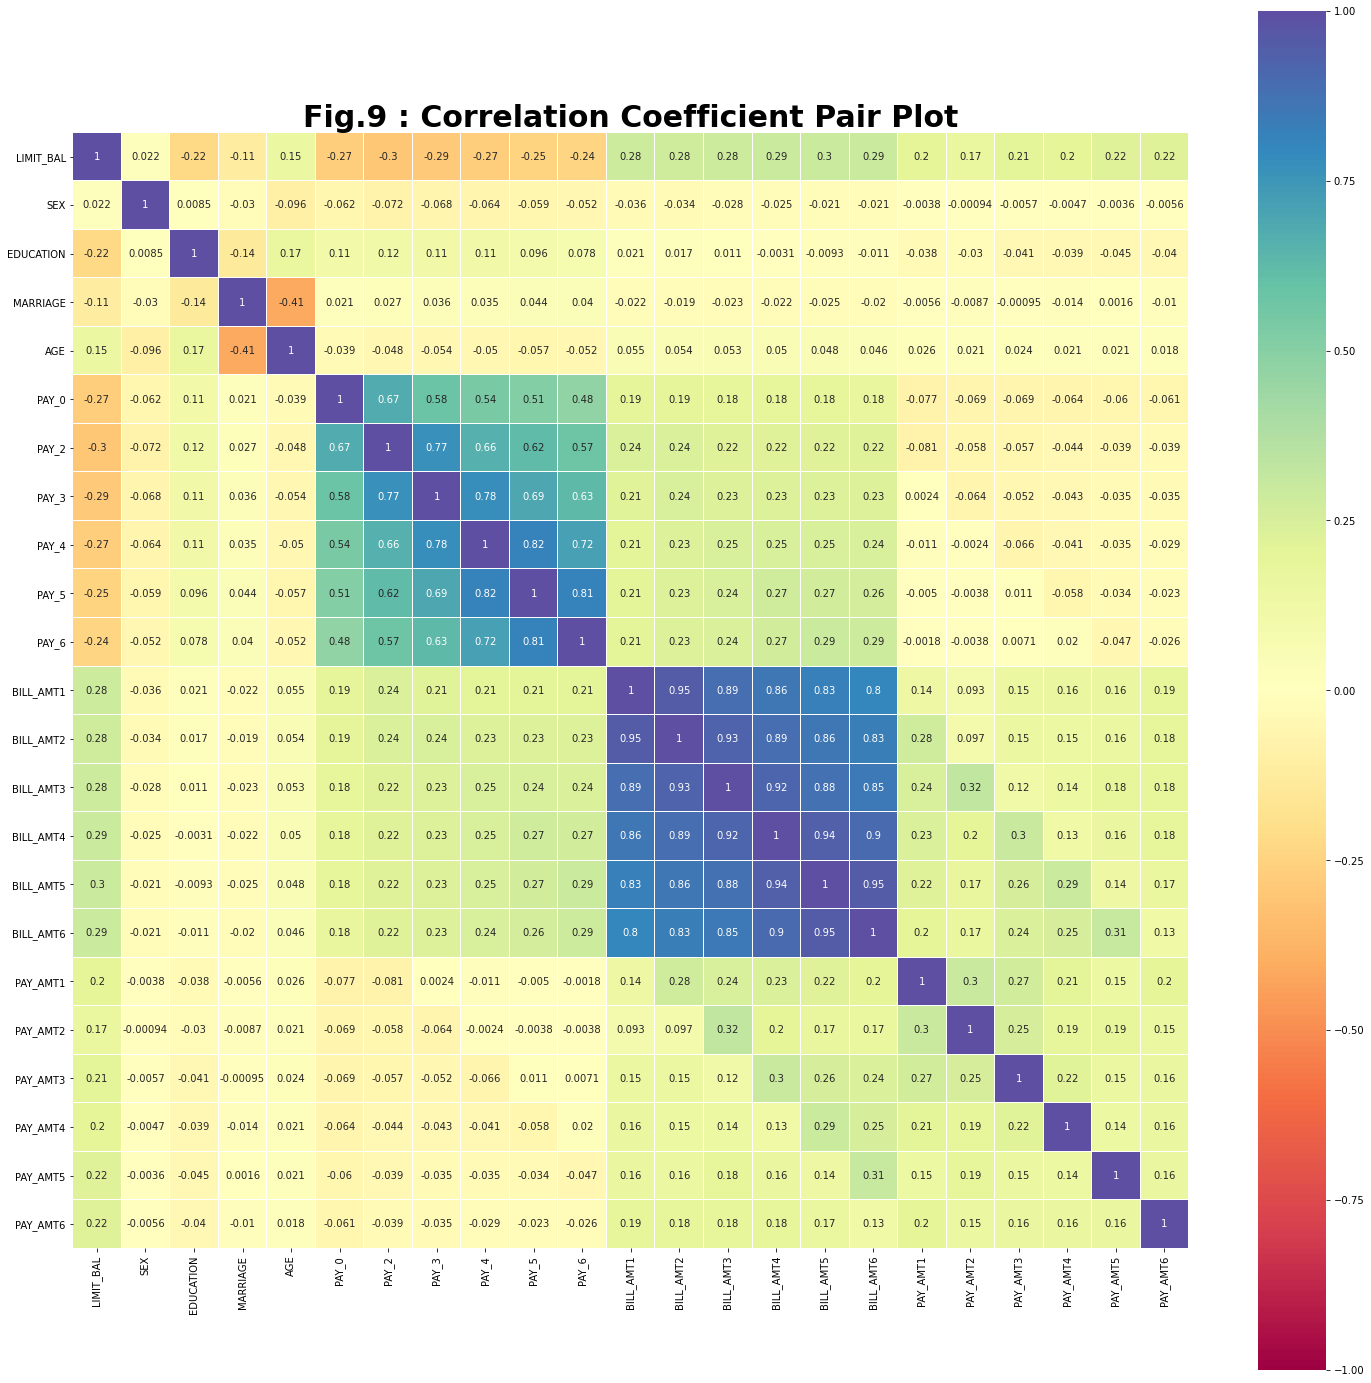

In [42]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = X_train.corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Fig.9 : Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

We can see that while features associated with bill amount ('BILL_AMT') are highly correlated to each other, yet have minimum contribution to target label ('default.payment.next.month'). In a case that computational resource is limited, one can drop these features without losing significant prediction power.

Payment status ('PAY' ) features are also correlated but at the same time they show highest contribution to the final label. The last column clearly demonstrates that by getting closer to current month the significant of payment status increases.

The negative correlation of 'SEX' and 'MARRIAGE' is also interesting and could be used for generating new feature but at this work, all these features remain intact and will be directly used in deep learning model.

## Normalization

In [4]:
def preprocess_data(X, scaler=None):
    """Preprocess input data by standardise features 
    by removing the mean and scaling to unit variance"""
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

In [5]:
X_train, scaler = preprocess_data(X_train)
test_final, _ = preprocess_data(X_test, scaler)

In [6]:
print("Train data shape: ", X_train.shape)
print("Train data shape: ", y_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (24000, 23)
Train data shape:  (24000, 1)
Test data shape:  (6000, 23)


# Training

Now we generate a random validation subset that is the 30% of the train set.

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size=0.3)

The layers have Relu as their activation function, moreover I chose to have different layers to have a high number of neurons that could allow me to learn all the parameters. The last layer has output 1 since we are dealing with a binary problem.  
The chosen loss function is the binary_crossentropy and since this is a binary problem the optimizer is adam.  
I fit the model with 20 epochs and 128 as batch size.

In [37]:
dims = X_train.shape[1]
initializer = tf.keras.initializers.glorot_normal(seed=1234) 

model = Sequential()
model.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
model.add(Dense(256, activation = "relu", kernel_initializer=initializer))
model.add(Dense(32, activation = "relu", kernel_initializer=initializer))
model.add(Dense(16, activation = "relu", kernel_initializer=initializer))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 512)               12288     
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_37 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 152,385
Trainable params: 152,385
Non-trainable params: 0
_________________________________________________________________


In [38]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/20
132/132 - 0s - loss: 0.4669 - accuracy: 0.8094 - val_loss: 0.4560 - val_accuracy: 0.8115
Epoch 2/20
132/132 - 0s - loss: 0.4376 - accuracy: 0.8192 - val_loss: 0.4490 - val_accuracy: 0.8154
Epoch 3/20
132/132 - 0s - loss: 0.4305 - accuracy: 0.8193 - val_loss: 0.4434 - val_accuracy: 0.8178
Epoch 4/20
132/132 - 0s - loss: 0.4259 - accuracy: 0.8219 - val_loss: 0.4428 - val_accuracy: 0.8182
Epoch 5/20
132/132 - 0s - loss: 0.4230 - accuracy: 0.8229 - val_loss: 0.4424 - val_accuracy: 0.8164
Epoch 6/20
132/132 - 0s - loss: 0.4175 - accuracy: 0.8236 - val_loss: 0.4424 - val_accuracy: 0.8146
Epoch 7/20
132/132 - 0s - loss: 0.4170 - accuracy: 0.8255 - val_loss: 0.4513 - val_accuracy: 0.8096
Epoch 8/20
132/132 - 0s - loss: 0.4129 - accuracy: 0.8253 - val_loss: 0.4570 - val_accuracy: 0.8069
Epoch 9/20
132/132 - 0s - loss: 0.4115 - accuracy: 0.8259 - val_loss: 0.4523 - val_accuracy: 0.8144
Epoch 10/20
132/132 - 0s - loss: 0.4095 - accuracy: 0.8268 - val_loss: 0.4458 - val_accuracy: 0.8139

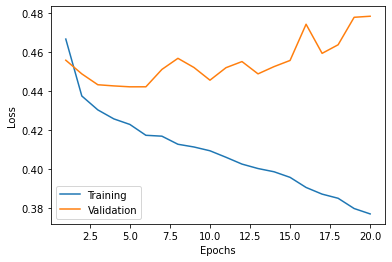

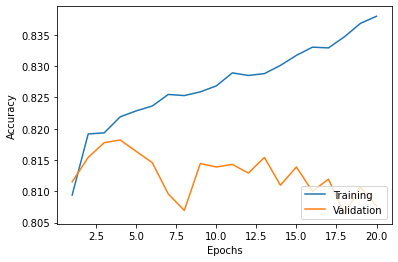

In [39]:
x_plot = list(range(1,20+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

Observing the first graphic, the one that plot the loss function, we notice how the model tends to overfit, we will solve it using regularization techniques

### Inspecting Layers

In [26]:
print('Model Input Tensors: ', model.input, end='\n\n')
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Model Input Tensors:  Tensor("dense_input:0", shape=(None, 23), dtype=float32)

Layers - Network Configuration:

dense True
Layer Configuration:
{'name': 'dense', 'trainable': True, 'batch_input_shape': (None, 23), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotNormal', 'config': {'seed': 1234}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dense_1 True
Layer Configuration:
{'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotNormal', 'config': {'seed': 1234}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None

In [25]:
for layer in range(len(model.get_weights())):
    print('Layer name:', model.weights[layer].name)
    print('Layer weights shape:', model.weights[layer].shape)
    print('Weight:', model.weights[layer], end = '\n\n')
    #print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Layer name: dense/kernel:0
Layer weights shape: (23, 512)
Weight: <tf.Variable 'dense/kernel:0' shape=(23, 512) dtype=float32, numpy=
array([[ 0.05633665,  0.00726831, -0.1320213 , ...,  0.07790587,
         0.06670467, -0.07950457],
       [ 0.09092577, -0.01038855,  0.05863575, ..., -0.08967923,
        -0.10380139, -0.12717424],
       [-0.1709314 ,  0.16956097,  0.03750182, ...,  0.06307612,
        -0.10761918, -0.06893465],
       ...,
       [ 0.01382634, -0.15110344, -0.0209448 , ..., -0.00231198,
        -0.04200265, -0.04175612],
       [ 0.03264897,  0.07049166,  0.0445128 , ...,  0.04742076,
         0.08354905,  0.06563976],
       [ 0.0544814 ,  0.00784378, -0.13450475, ..., -0.04135965,
         0.0295298 , -0.09317478]], dtype=float32)>

Layer name: dense/bias:0
Layer weights shape: (512,)
Weight: <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
array([ 0.03070362, -0.17216504,  0.03233748,  0.00815422, -0.06036586,
       -0.01925381,  0.00473805, -0.1172

## L1 Kernel/Bias regularization

In [43]:
initializer = tf.keras.initializers.glorot_normal(seed=1234) 

model_l1 = Sequential()
model_l1.add(Dense(256, input_shape=(dims,), activation = "relu",kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(128, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(32, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(16, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(1, activation = "sigmoid", kernel_initializer=initializer))

model_l1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_l1_history=model_l1.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/20
132/132 - 0s - loss: 11.5396 - accuracy: 0.7589 - val_loss: 2.1855 - val_accuracy: 0.7792
Epoch 2/20
132/132 - 0s - loss: 1.1072 - accuracy: 0.7778 - val_loss: 0.7458 - val_accuracy: 0.7792
Epoch 3/20
132/132 - 0s - loss: 0.6765 - accuracy: 0.7778 - val_loss: 0.6294 - val_accuracy: 0.7792
Epoch 4/20
132/132 - 0s - loss: 0.6167 - accuracy: 0.7778 - val_loss: 0.6070 - val_accuracy: 0.7792
Epoch 5/20
132/132 - 0s - loss: 0.6041 - accuracy: 0.7778 - val_loss: 0.5983 - val_accuracy: 0.7792
Epoch 6/20
132/132 - 0s - loss: 0.5974 - accuracy: 0.7778 - val_loss: 0.5940 - val_accuracy: 0.7792
Epoch 7/20
132/132 - 0s - loss: 0.5946 - accuracy: 0.7778 - val_loss: 0.5919 - val_accuracy: 0.7792
Epoch 8/20
132/132 - 0s - loss: 0.5927 - accuracy: 0.7778 - val_loss: 0.5904 - val_accuracy: 0.7792
Epoch 9/20
132/132 - 0s - loss: 0.5916 - accuracy: 0.7778 - val_loss: 0.5892 - val_accuracy: 0.7792
Epoch 10/20
132/132 - 0s - loss: 0.5907 - accuracy: 0.7778 - val_loss: 0.5890 - val_accuracy: 0.779

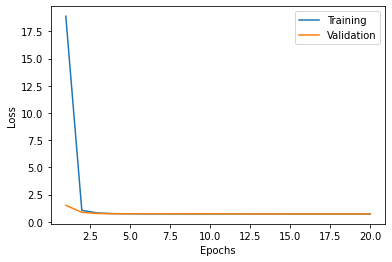

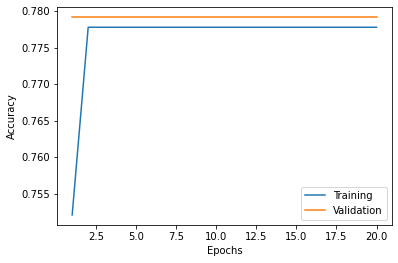

In [42]:
plot_history(model_l1_history)

## L2 Kernel/Bias regularization

In [44]:
model_l2 = Sequential()
model_l2.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(256, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(32, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(16, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(1, activation = "sigmoid"))

model_l2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model_l2_history=model_l2.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/20
132/132 - 0s - loss: 1.8146 - accuracy: 0.7985 - val_loss: 0.6846 - val_accuracy: 0.8068
Epoch 2/20
132/132 - 0s - loss: 0.5882 - accuracy: 0.8085 - val_loss: 0.5440 - val_accuracy: 0.8076
Epoch 3/20
132/132 - 0s - loss: 0.5252 - accuracy: 0.8105 - val_loss: 0.5210 - val_accuracy: 0.8125
Epoch 4/20
132/132 - 0s - loss: 0.5073 - accuracy: 0.8133 - val_loss: 0.5074 - val_accuracy: 0.8132
Epoch 5/20
132/132 - 0s - loss: 0.5000 - accuracy: 0.8150 - val_loss: 0.5043 - val_accuracy: 0.8190
Epoch 6/20
132/132 - 0s - loss: 0.4964 - accuracy: 0.8170 - val_loss: 0.5029 - val_accuracy: 0.8135
Epoch 7/20
132/132 - 0s - loss: 0.4928 - accuracy: 0.8161 - val_loss: 0.4995 - val_accuracy: 0.8103
Epoch 8/20
132/132 - 0s - loss: 0.4900 - accuracy: 0.8173 - val_loss: 0.4950 - val_accuracy: 0.8156
Epoch 9/20
132/132 - 0s - loss: 0.4882 - accuracy: 0.8155 - val_loss: 0.4924 - val_accuracy: 0.8139
Epoch 10/20
132/132 - 0s - loss: 0.4866 - accuracy: 0.8173 - val_loss: 0.4973 - val_accuracy: 0.8140

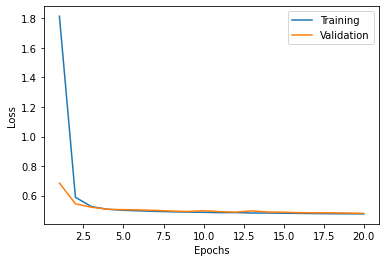

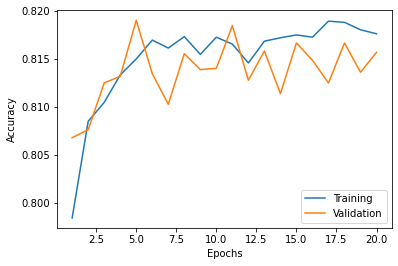

In [45]:
plot_history(model_l2_history)

In [21]:
print('Layers name:', model.weights[6].name)
print('Layers kernel shape:', model.weights[6].shape)
print('Kernel:', model.weights[6][0], end = '\n\n')
print('Layers name:', model.weights[7].name)
print('Layers kernel shape:', model.weights[7].shape)
print('Kernel:', model.weights[7])

Layers name: dense_3/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[-0.02366317  0.15799977 -0.41142777  0.09120074 -0.22085351 -0.21507919
 -0.02755022 -0.18046674 -0.24165002  0.28340226  0.46151546  0.23920104
 -0.17381953  0.39209726  0.2327049  -0.06176507], shape=(16,), dtype=float32)

Layers name: dense_3/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_3/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.02274024, -0.06810214, -0.11104046,  0.07416437,  0.00036121,
       -0.09587342, -0.03366666,  0.13913901,  0.1159813 , -0.03131237,
        0.07452592, -0.01457682, -0.00953163,  0.07221452, -0.04944876,
       -0.02028977], dtype=float32)>


In [22]:
print('Layers name:', model_l1.weights[6].name)
print('Layers kernel shape:', model_l1.weights[6].shape)
print('Kernel:', model_l1.weights[6][0], end = '\n\n')
print('Layers name:', model_l1.weights[7].name)
print('Layers kernel shape:', model_l1.weights[7].shape)
print('Kernel:', model_l1.weights[7])

Layers name: dense_13/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[-4.97600122e-05 -3.59298538e-05  4.79511742e-04  2.02972093e-04
  2.85971706e-04  9.59491590e-05 -1.21117046e-04 -2.73315760e-04
  1.44530582e-04  1.14286391e-04  2.10039318e-04  2.38943816e-04
 -1.71287131e-04  1.85366698e-05 -1.00780155e-04 -4.50852058e-05], shape=(16,), dtype=float32)

Layers name: dense_13/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_13/bias:0' shape=(16,) dtype=float32, numpy=
array([ 1.5065455e-04,  1.3299010e-05,  2.3014975e-01,  3.3114731e-05,
       -2.5803375e-04,  5.9887107e-02,  5.7414181e-05,  1.8825704e-01,
        1.0102674e-01,  8.1918016e-04,  2.6806421e-04, -2.0503008e-05,
        8.3553750e-05,  3.2989372e-04,  9.8345845e-06,  4.2416714e-04],
      dtype=float32)>


In [23]:
print('Layers name:', model_l2.weights[6].name)
print('Layers kernel shape:', model_l2.weights[6].shape)
print('Kernel:', model_l2.weights[6][0], end = '\n\n')
print('Layers name:', model_l2.weights[7].name)
print('Layers kernel shape:', model_l2.weights[7].shape)
print('Kernel:', model_l2.weights[7])

Layers name: dense_18/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[-1.7960096e-34  4.7804978e-02 -8.1850775e-02 -6.8203479e-02
  1.7695374e-31 -5.2842762e-02 -1.8262638e-26  6.8312645e-02
  5.7701960e-02  5.7719648e-02  6.9403678e-02  5.0417952e-02
 -2.6117492e-34 -7.6020084e-02 -8.5706316e-02 -7.5808197e-02], shape=(16,), dtype=float32)

Layers name: dense_18/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_18/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.0000000e+00,  6.2093765e-02,  1.6000885e-01,  1.0912390e-01,
        4.6886047e-25,  8.1633456e-02, -4.8137105e-24,  9.3304016e-02,
        7.6834202e-02,  7.5337492e-02,  9.5745251e-02,  6.3496299e-02,
       -1.6832820e-34,  1.4243044e-01,  1.6333796e-01,  1.4659251e-01],
      dtype=float32)>


In [47]:
print('Sum of the values of the weights without regularization:', sum(abs(model.weights[6][0])).numpy() + sum(abs(model.weights[7])).numpy())
print('Sum of the values of the weights with regularization L1:', sum(abs(model_l1.weights[6][0])).numpy() + sum(abs(model_l1.weights[7])).numpy())
print('Sum of the values of the weights with regularization L2:', sum(abs(model_l2.weights[6][0])).numpy() + sum(abs(model_l2.weights[7])).numpy())

Sum of the values of the weights without regularization: 4.5833917
Sum of the values of the weights with regularization L1: 0.5843976
Sum of the values of the weights with regularization L2: 2.7549496


We notice how the weights change according to the different regularization techniques.

## Dropout

I have played with the dropout weight and chosen the "best" in according to loss and accuracy performance

In [48]:
model_d = Sequential()
model_d.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
model_d.add(Dense(256, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.5))
model_d.add(Dense(32, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.5))
model_d.add(Dense(16, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.5))
model_d.add(Dense(1, activation = "sigmoid", kernel_initializer=initializer))


model_d.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
hystory_d=model_d.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/20
132/132 - 0s - loss: 0.5559 - accuracy: 0.7636 - val_loss: 0.4826 - val_accuracy: 0.8026
Epoch 2/20
132/132 - 0s - loss: 0.4995 - accuracy: 0.7988 - val_loss: 0.4665 - val_accuracy: 0.8072
Epoch 3/20
132/132 - 0s - loss: 0.4770 - accuracy: 0.8024 - val_loss: 0.4545 - val_accuracy: 0.8036
Epoch 4/20
132/132 - 0s - loss: 0.4692 - accuracy: 0.8068 - val_loss: 0.4491 - val_accuracy: 0.8158
Epoch 5/20
132/132 - 0s - loss: 0.4633 - accuracy: 0.8063 - val_loss: 0.4471 - val_accuracy: 0.8158
Epoch 6/20
132/132 - 0s - loss: 0.4577 - accuracy: 0.8075 - val_loss: 0.4437 - val_accuracy: 0.8181
Epoch 7/20
132/132 - 0s - loss: 0.4564 - accuracy: 0.8074 - val_loss: 0.4445 - val_accuracy: 0.8161
Epoch 8/20
132/132 - 0s - loss: 0.4518 - accuracy: 0.8083 - val_loss: 0.4485 - val_accuracy: 0.8146
Epoch 9/20
132/132 - 0s - loss: 0.4514 - accuracy: 0.8080 - val_loss: 0.4464 - val_accuracy: 0.8056
Epoch 10/20
132/132 - 0s - loss: 0.4514 - accuracy: 0.8095 - val_loss: 0.4476 - val_accuracy: 0.8060

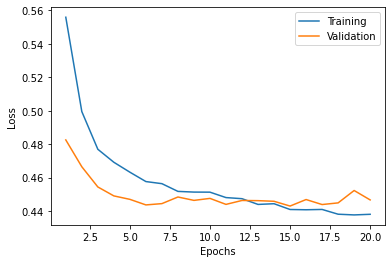

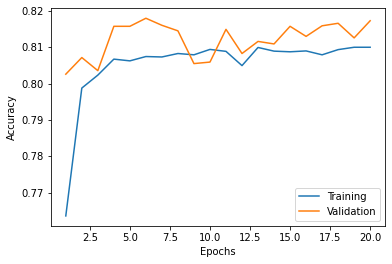

In [49]:
plot_history(hystory_d)

## Conclusion

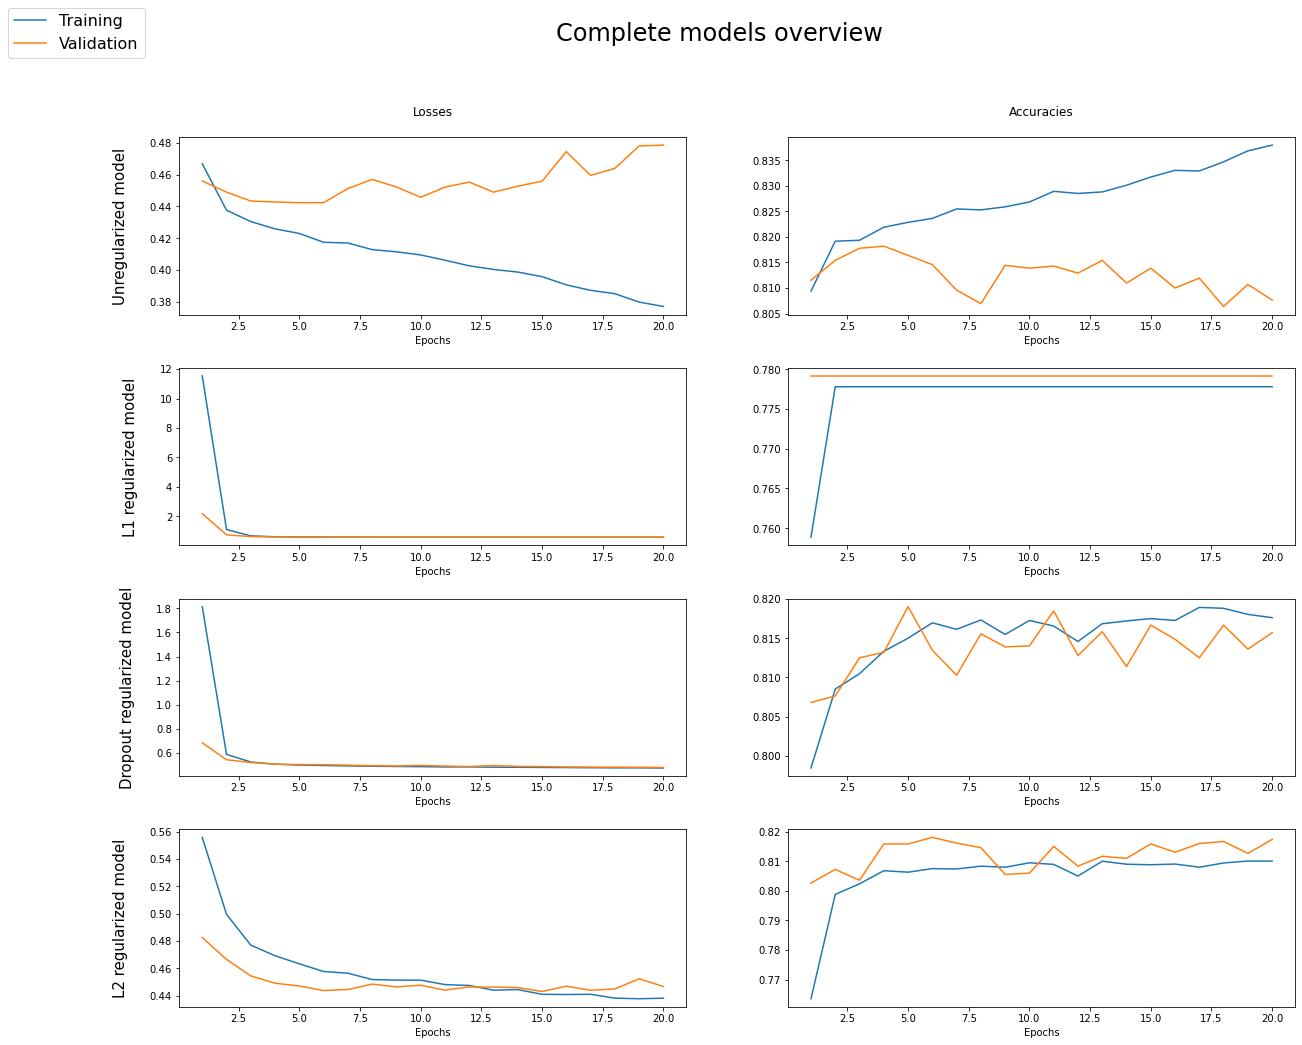

In [50]:
fig, axs = plt.subplots(4, 2, figsize=(20,16),gridspec_kw={'hspace': .3, 'wspace': .2})
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8),  = axs
fig.suptitle('Complete models overview', fontsize = 24)
ax1.set_title('Losses\n'); ax2.set_title('Accuracies\n');
ax1.set_ylabel('Unregularized model\n', fontsize = 15.0); ax3.set_ylabel('L1 regularized model\n', fontsize = 15.0); ax5.set_ylabel('L2 regularized model\n', fontsize = 15.0); ax7.set_ylabel('Dropout regularized model\n', fontsize = 15.0)
ax1.plot(x_plot, network_history.history['loss']); ax1.plot(x_plot, network_history.history['val_loss'])
ax2.plot(x_plot, network_history.history['accuracy']); ax2.plot(x_plot, network_history.history['val_accuracy'])
ax3.plot(x_plot, model_l1_history.history['loss']); ax3.plot(x_plot, model_l1_history.history['val_loss'])
ax4.plot(x_plot, model_l1_history.history['accuracy']); ax4.plot(x_plot, model_l1_history.history['val_accuracy'])
ax5.plot(x_plot, model_l2_history.history['loss']); ax5.plot(x_plot, model_l2_history.history['val_loss'])
ax6.plot(x_plot, model_l2_history.history['accuracy']); ax6.plot(x_plot, model_l2_history.history['val_accuracy'])
ax7.plot(x_plot, hystory_d.history['loss']); ax7.plot(x_plot, hystory_d.history['val_loss'])
ax8.plot(x_plot, hystory_d.history['accuracy']); ax8.plot(x_plot, hystory_d.history['val_accuracy'])
ax1.set(xlabel = "Epochs"); ax2.set(xlabel = "Epochs"); ax3.set(xlabel = "Epochs"); ax4.set(xlabel = "Epochs"); ax5.set(xlabel = "Epochs"); ax6.set(xlabel = "Epochs"); ax7.set(xlabel = "Epochs")
ax8.set(xlabel = "Epochs"); 
fig.legend(['Training', 'Validation'], loc='upper left', fontsize = 16)
plt.show()

# Prediction on test set

I use the best model, the one with the l2 regularization, to predict the target values on the test set.

In [60]:
y_test = model_l2.predict_classes(test_final)

In [61]:
final=pd.DataFrame(y_test,columns=['target'])

In [62]:
final.target.value_counts()

0    5296
1     704
Name: target, dtype: int64

Here i save the class predicted.

In [63]:
out_file = open("alessandro_pigato_852482_score1.txt","w")
for i in y_test:
    out_file.write(str(i)+'\n')
out_file.close()